# Handwritten letter recognition with machine learning

## Data and preparing it

importing needed libraries (tensorflow and matplotlib)

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from PIL import Image

Dataset used in project is download from http://ai.stanford.edu/~btaskar/ocr/ and converted to csv file type. Dataset contains handwritten words, which have been divided into letters, collected by Rob Kassel at MIT Spoken Language Systems Group.

Data contains fields:

1. id: each letter is assigned a unique integer id
2. letter: a-z
3. next_id: id for next letter in the word, -1 if last letter
4. word_id: each word is assigned a unique integer id (not used)
5. position: position of letter in the word (not used)
6. fold: 0-9 -- cross-validation fold
7. p_i_j: 0/1 -- value of pixel in row i, column j

Data is converted two numpy arrays. Array named letters have info  of letter as ascii value. Types of valeus are floats. Arrays contains the image arrays of letters. Types of values are float32.

In [2]:
with open("letter_data.csv",'r') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter = ',')
    arrays = []
    letters = []
    for line in csv_reader:
        if line[0].isnumeric():
            letters.append(float(ord(line[1]))) #changed characters to ascii ints and then to floats
            letter_data = []
            first = 6
            last = 14
            for i in range(16):
                row = line[first:last]
                letter_data.append(row)
                first += 8; last += 8
            letter_array = np.array(letter_data)
            arrays.append(letter_array.astype(np.float32))
        else:
            continue

Arrays are restoreed to variables features and labels. Labels contains Ascii info of letters and features contains image arrays.

In [3]:
features = np.array(arrays)
labels = np.array(letters)

Let's check arrays.

Letter: o


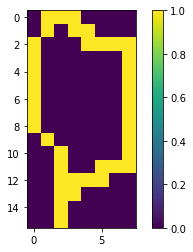

In [11]:
print("Letter:", chr(int(labels[2500])))

im = features[2500]
for row in im:
    row.astype(np.uint8)
    
plt.figure()
plt.imshow(im)
plt.colorbar()
plt.show()


## Model

In [12]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(16, 8)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(127)
])


In [13]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [14]:
model.fit(features, labels, epochs=1)

1630/1630 [==============================] - 4s 3ms/step - loss: 1.2571 - accuracy: 0.6575
